In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import charset_normalizer as charn

In [10]:
from charset_normalizer import from_path
csv_path = 'Resources/Twitch_game_data_fixed_names.csv'

data = from_path(csv_path).best()
encoding = data.encoding_aliases[1]
twitch_df = pd.read_csv(csv_path, encoding=encoding)
print(twitch_df.shape)
twitch_df.head(3)

(18600, 12)


,Rank,Game,Month,Year,Hours Watched,Hours Streamed,Peak Viewers,Peak Channels,Streamers,Average Viewers,Average Channels,Average Viewer Ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1,2016,45185893,433397,315083,1100,44074,60815,583,104.26


In [14]:
# Determine number of rows in csv file
num_rows = len(twitch_df)
print("Number of rows:", num_rows)

NUmber of rows: 18600


In [15]:
# Determine data types in each column
twitch_df.dtypes

Rank                      int64
Game                     object
Month                     int64
Year                      int64
Hours Watched             int64
Hours Streamed            int64
Peak Viewers              int64
Peak Channels             int64
Streamers                 int64
Average Viewers           int64
Average Channels          int64
Average Viewer Ratio    float64
dtype: object

In [ ]:
# twitch_df = twitch_df.drop(columns=[])

In [20]:
# Rename "Game" column to "Title", so to match GAME DATE.csv
twitch_df.rename(columns={'Game': "Title"}, inplace=True)
twitch_df.tail()

,Rank,Title,Month,Year,Hours Watched,Hours Streamed,Peak Viewers,Peak Channels,Streamers,Average Viewers,Average Channels,Average Viewer Ratio
18595,196,PlateUp!,9,2023,560064,18617,16476,71,4034,778,25,30.08
18596,197,Pokemon GO,9,2023,551596,16578,3001,73,3926,767,23,33.27
18597,198,Bloons TD 6,9,2023,540735,20142,10320,65,5673,752,28,26.85
18598,199,Ragnarok Online,9,2023,533644,27014,11508,68,1144,742,37,19.75
18599,200,Bloodborne,9,2023,530610,36741,10300,98,6652,737,51,14.44


In [19]:
# Select 'Title' columen and identify the number of unqiue Game Titles.
unique_title = twitch_df['Title'].nunique()
print(f'The number of unqiue game titles that are listed in this csv file: {unique_title}')


The number of unqiue game titles that are listed in this csv file: 2160


In [23]:
# Sort data by 'Title' and 'Year'
twitch_df_sorted = twitch_df.sort_values(by=['Title', 'Year'])
twitch_df_sorted.head(10)

,Rank,Title,Month,Year,Hours Watched,Hours Streamed,Peak Viewers,Peak Channels,Streamers,Average Viewers,Average Channels,Average Viewer Ratio
4598,199,.hack//G.U. Last Recode,11,2017,145350,35258,1222,258,3174,202,49,4.12
15558,159,20 Minutes Till Dawn,6,2022,911356,12253,29743,80,3616,1267,17,74.38
6508,109,60 Parsecs!,9,2018,529688,1867,31960,27,606,736,2,283.71
1325,126,60 Seconds!,7,2016,268754,597,32505,10,275,361,0,450.17
1453,54,60 Seconds!,8,2016,772786,2065,56904,30,628,1040,2,374.23
2198,199,60 Seconds!,11,2016,109473,503,5297,5,193,152,0,217.64
2918,119,60 Seconds!,3,2017,263482,679,31311,10,240,354,0,388.04
4581,182,60 Seconds!,11,2017,179250,584,10458,8,228,249,0,306.93
4785,186,60 Seconds!,12,2017,180788,669,23476,9,260,243,0,270.24
6393,194,60 Seconds!,8,2018,222209,871,18245,8,414,299,1,255.12


In [25]:
# Display all rows with 'League of Legends'
lol_df = twitch_df_sorted[twitch_df_sorted['Title'] == 'League of Legends']
lol_df.head()

,Rank,Title,Month,Year,Hours Watched,Hours Streamed,Peak Viewers,Peak Channels,Streamers,Average Viewers,Average Channels,Average Viewer Ratio
0,1,League of Legends,1,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
200,1,League of Legends,2,2016,93154772,1266715,475784,2712,117996,134035,1822,73.54
400,1,League of Legends,3,2016,94514511,1264029,599114,2585,117734,127206,1701,74.77
600,1,League of Legends,4,2016,88389049,1217250,553165,2945,113251,122933,1692,72.61
800,1,League of Legends,5,2016,80679320,1196096,433005,2635,118593,108585,1609,67.45


In [39]:
# Drop 'Month', 'Peak Viewers', 'Peak Channels', 'Average Viewers Ratio' columns
lol_df = lol_df.drop(columns=['Month', 'Peak Viewers', 'Peak Channels', 'Average Viewer Ratio'])
lol_df.head()

,Rank,Title,Year,Hours Watched,Hours Streamed,Streamers,Average Viewers,Average Channels
0,1,League of Legends,2016,94377226,1362044,129172,127021,1833
200,1,League of Legends,2016,93154772,1266715,117996,134035,1822
400,1,League of Legends,2016,94514511,1264029,117734,127206,1701
600,1,League of Legends,2016,88389049,1217250,113251,122933,1692
800,1,League of Legends,2016,80679320,1196096,118593,108585,1609


In [40]:
# Group by 'Year' and aggregate the required columns
lol_grouped = lol_df.groupby('Year').agg({
    'Hours Watched': 'sum',         # Sum total hours watched
    'Hours Streamed': 'sum',        # Sum total hours streamed
    'Streamers': 'mean',            # Average the number of streamers
    'Average Viewers': 'mean',      # Average the number of average viewers
    'Average Channels': 'mean'      # Average the number of average channels
}).reset_index()

# Round down all averages (except 'Average Viewer Ratio') using np.floor
lol_grouped['Streamers'] = np.floor(lol_grouped['Streamers']).astype(int)
lol_grouped['Average Viewers'] = np.floor(lol_grouped['Average Viewers']).astype(int)
lol_grouped['Average Channels'] = np.floor(lol_grouped['Average Channels']).astype(int)

# Rename 'Streamers' column to 'Avergae Streamers'
lol_grouped.rename(columns={'Streamers': 'Average Streamers'}, inplace= True)

lol_grouped.head(10)

,Year,Hours Watched,Hours Streamed,Average Streamers,Average Viewers,Average Channels
0,2016,1035469850,14057492,105951,118083,1602
1,2017,1022398595,15163801,119521,117081,1733
2,2018,985380685,18570999,149108,112639,2123
3,2019,1118435546,24463648,186076,127911,2795
4,2020,1553536532,38273316,236337,177187,4360
5,2021,1735661105,37975030,230779,198402,4347
6,2022,1556699612,27952114,232324,177922,3198
7,2023,978763404,19221043,203574,149611,2937


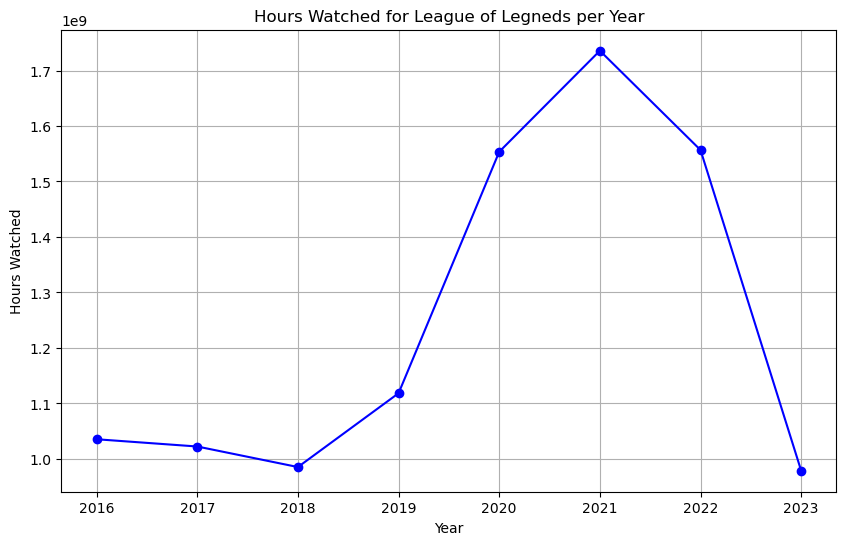

In [41]:
# Plot 'Hours Watched" per year as a line graph
plt.figure(figsize=(10, 6))
plt.plot(lol_grouped['Year'], lol_grouped['Hours Watched'], marker='o', linestyle='-', color='b')
plt.title('Hours Watched for League of Legneds per Year')
plt.xlabel('Year')
plt.ylabel('Hours Watched')
plt.grid(True)

# Show the plot
plt.show()